In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('dark_background')

filename='vehicles.csv'
df=pd.read_csv(filename,parse_dates=['posting_date'])


In [148]:
df=df.drop(columns=['county','state','lat','long'])
# filters
# df = df[df['posting_date'] > 2019]
df = df[df['year'] > 1999]
df = df[df['odometer'] < 150000]
df = df[(df['condition'] == 'excellent') | (df['condition'] == 'good')]
df = df[(df['transmission'] == 'manual') | (df['transmission'] == 'automatic')]
manufacturer_list=['subaru','bmw','toyota','ford','lexus','gmc']
df = df[df['manufacturer'].isin(manufacturer_list)]
# drop rows where 'description' is missing
df=df.dropna(subset=['description'])
df = df.replace({np.nan: None})
df['year'] = df['year'].astype(int)

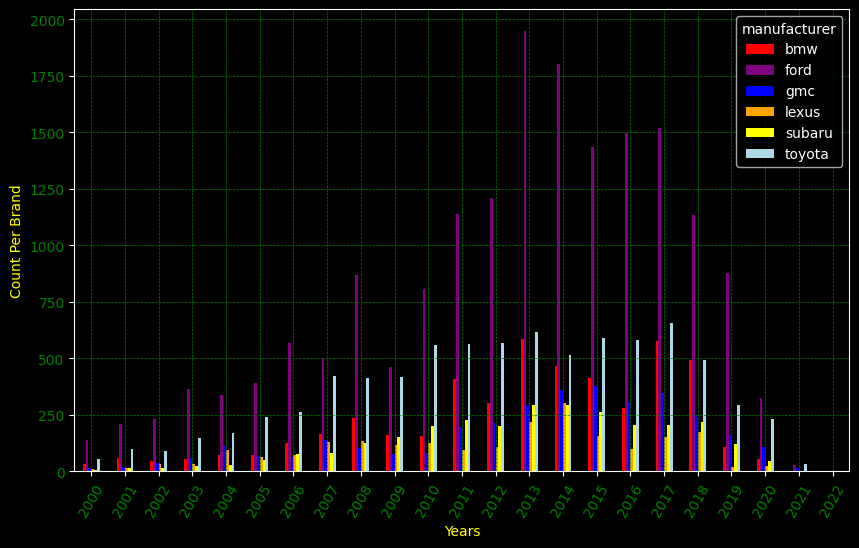

In [149]:
df_pivot = pd.pivot_table(
		df,
		values="model", # value
		index="year", # row
		columns="manufacturer", 
		aggfunc='count'
	)	

colors=['red', 'purple', 'blue', 'orange','yellow','lightblue']
ax = df_pivot.plot(kind="bar",color=colors,figsize=(10,6))
fig = ax.get_figure()
ax.set_xlabel("Years",color='yellow')
ax.set_ylabel("Count Per Brand",color='yellow')
plt.xticks(rotation=60,color='green')
plt.yticks(color='green')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.show()

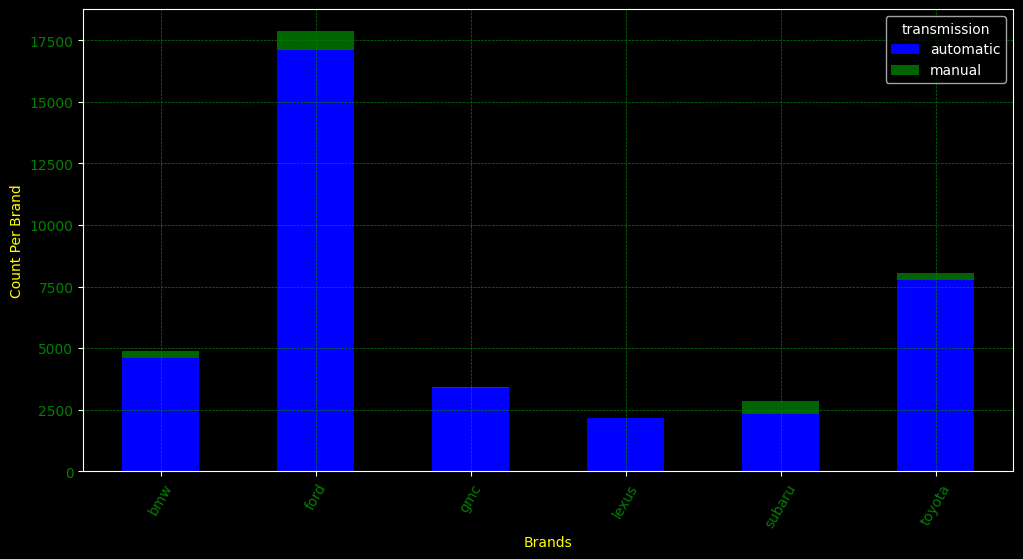

In [151]:
# manufacturer_list=['subaru','bmw','toyota']
# df = df[df['manufacturer'].isin(manufacturer_list)]
# cars_manual=df[df['transmission']=='manual']
# cars_automatic=df[df['transmission']=='automatic']

# dfg = df.groupby(['manufacturer'])['transmission'].count()

dfp=df.pivot_table(index = 'manufacturer', columns = 'transmission',values='id', aggfunc='count' )

# dfp=df.groupby(['manufacturer','transmission']).count()

colors=['blue', 'darkgreen']
ax = dfp.plot(kind="bar",color=colors,stacked=True,figsize=(12,6))
fig = ax.get_figure()
ax.set_xlabel("Brands",color='yellow')
ax.set_ylabel("Count Per Brand",color='yellow')
plt.xticks(rotation=60,color='green')
plt.yticks(color='green')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)


plt.show()

